In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [ ]:
!pip install scikit-image

In [ ]:
!pip install pillow

In [ ]:
!pip install pixellib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pixellib


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [ ]:

!pip install --upgrade tensorflow


# default_argmax/xs/1

In [ ]:

# TF2 version
import io
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image as PILImage

IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

# Download the model from Tensorflow Hub.
keras_layer = hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/autoseg-edgetpu/default_argmax/xs/1')
model = tf.keras.Sequential([keras_layer])
model.build([None, IMAGE_WIDTH, IMAGE_HEIGHT, 3])

# Preprocess image.
#image_url = "https://storage.googleapis.com/tf_model_garden/models/edgetpu/images/ADE_train_00016869.jpeg"
#image_response = requests.get(image_url)
#image = PILImage.open(io.BytesIO(image_response.content)).convert('RGB')
# Replace the URL with the local file path to your image
image_path = "/content/drive/MyDrive/10820231/17.jpg.JPG"
image = PILImage.open(image_path).convert('RGB')

min_dim = min(image.size[0], image.size[1])
image = image.resize((IMAGE_WIDTH * image.size[0] // min_dim,
                      IMAGE_HEIGHT * image.size[1] // min_dim))
input_data = np.expand_dims(image, axis=0)
input_data = input_data[:, :IMAGE_WIDTH,:IMAGE_HEIGHT, :]
input_data = input_data.astype(np.float) / 128 - 0.5

# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

<ipython-input-3-816c04d68033>:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  input_data = input_data.astype(np.float) / 128 - 0.5


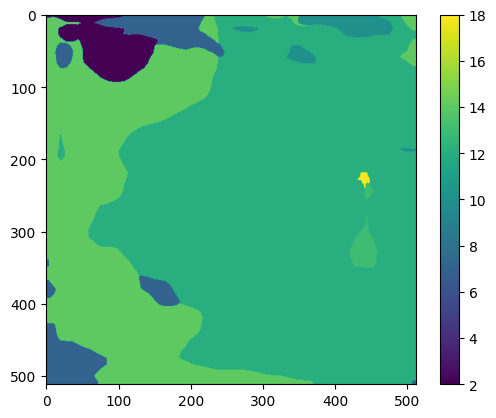

In [ ]:
# Visualize the segmentation result
segmentation_mask = output_data.numpy()[0]
plt.imshow(segmentation_mask, cmap='viridis')
plt.colorbar()
plt.show()


# fused_argmax/s/1'

<ipython-input-10-26b7df8065b1>:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  input_data = input_data.astype(np.float) / 128 - 0.5


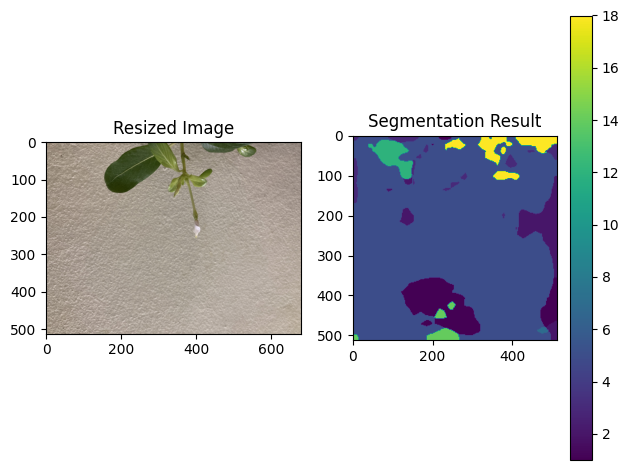

In [ ]:
# TF2 version
import io
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image as PILImage
from google.colab.patches import cv2_imshow
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

# Download the model from Tensorflow Hub.
keras_layer = hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/deeplab-edgetpu/fused_argmax/s/1')
model = tf.keras.Sequential([keras_layer])
model.build([None, IMAGE_WIDTH, IMAGE_HEIGHT, 3])

# Preprocess image.
#image_url = "https://storage.googleapis.com/tf_model_garden/models/edgetpu/images/ADE_train_00016869.jpeg"
#image_response = requests.get(image_url)
#image = PILImage.open(io.BytesIO(image_response.content)).convert('RGB')
image_path = "/content/drive/MyDrive/Flowerdata/70820233/IMG_8623.JPG"
image = PILImage.open(image_path).convert('RGB')


min_dim = min(image.size[0], image.size[1])
image = image.resize((IMAGE_WIDTH * image.size[0] // min_dim,
                      IMAGE_HEIGHT * image.size[1] // min_dim))
input_data = np.expand_dims(image, axis=0)
input_data = input_data[:, :IMAGE_WIDTH,:IMAGE_HEIGHT, :]
input_data = input_data.astype(np.float) / 128 - 0.5

# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

# Visualize the resized image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Resized Image')

# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

# Visualize the segmentation result
segmentation_mask = output_data.numpy()[0]
plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask, cmap='viridis')
plt.title('Segmentation Result')
plt.colorbar()

plt.tight_layout()
plt.show()

# fused_argmax/m/1

<ipython-input-4-43c3707a211a>:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  input_data = input_data.astype(np.float) / 128 - 0.5


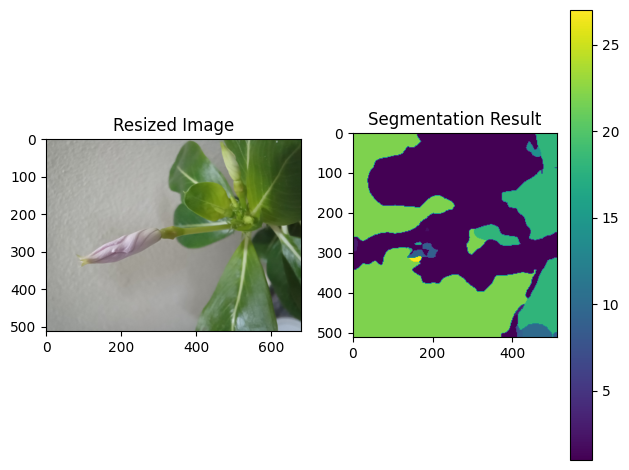

In [ ]:
# TF2 version
import io
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image as PILImage
from google.colab.patches import cv2_imshow
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

# Download the model from Tensorflow Hub.
keras_layer = hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/deeplab-edgetpu/fused_argmax/m/1')
model = tf.keras.Sequential([keras_layer])
model.build([None, IMAGE_WIDTH, IMAGE_HEIGHT, 3])

# Preprocess image.
#image_url = "https://storage.googleapis.com/tf_model_garden/models/edgetpu/images/ADE_train_00016869.jpeg"
#image_response = requests.get(image_url)
#image = PILImage.open(io.BytesIO(image_response.content)).convert('RGB')
image_path = "/content/drive/MyDrive/30820231/22.jpg.jpg"
image = PILImage.open(image_path).convert('RGB')


min_dim = min(image.size[0], image.size[1])
image = image.resize((IMAGE_WIDTH * image.size[0] // min_dim,
                      IMAGE_HEIGHT * image.size[1] // min_dim))
input_data = np.expand_dims(image, axis=0)
input_data = input_data[:, :IMAGE_WIDTH,:IMAGE_HEIGHT, :]
input_data = input_data.astype(np.float) / 128 - 0.5

# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

# Visualize the resized image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Resized Image')

# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

# Visualize the segmentation result
segmentation_mask = output_data.numpy()[0]
plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask, cmap='viridis')
plt.title('Segmentation Result')
plt.colorbar()

plt.tight_layout()
plt.show()

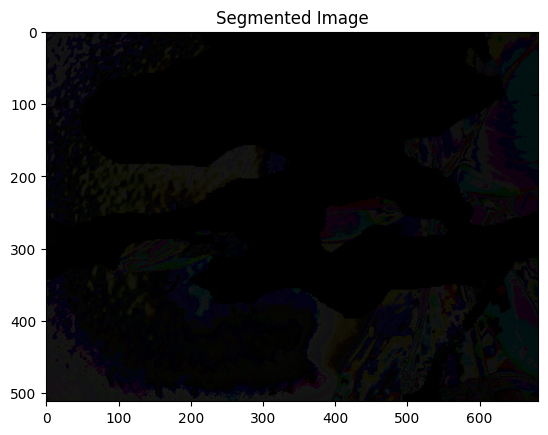

In [ ]:
# ...

import cv2

# Resize the segmentation mask to match the dimensions of the resized image
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.width, image.height), interpolation=cv2.INTER_NEAREST)

# Apply the segmentation mask to the original image
segmented_image = np.array(image)  # Convert PIL image to NumPy array

# Convert the segmentation mask to the same data type as the image
segmentation_mask_resized = segmentation_mask_resized.astype(np.uint8)

# Apply bitwise AND operation to highlight the segmented region
segmented_image[:, :, 0] = segmented_image[:, :, 0] & segmentation_mask_resized  # Red channel
segmented_image[:, :, 1] = segmented_image[:, :, 1] & segmentation_mask_resized  # Green channel
segmented_image[:, :, 2] = segmented_image[:, :, 2] & segmentation_mask_resized  # Blue channel

# Visualize the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.unique(segmentation_mask)

array([ 1.,  2.,  3.,  5.,  8.,  9., 10., 14., 18., 22., 27.],
      dtype=float32)